# 4. házi feladat (HF4)

Beadási határidő: november 15. éjfél

Beküldés: a Microsoft Teams felületén keresztül

Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!

---

## 1. feladat (HF4/1) (5 pont)

Ebben a feladatban a logisztikus regresszió algoritmusát kell megvalósítanod spam-szűrés céljából. A UCI adattárház Spambase adatain fogunk vizsgálódni. Az adatokat a saját gépedre való letöltés nélkül igyekezz betölteni!

In [1]:
#importáltam

In [78]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import urllib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**a)** (4 pont)<br>
Programozz le egy egyszerű logisztikus regressziós osztályozó algoritmust (tehát ne beépített algoritmust használj)! Írj kódokat, amik a tanítóhalmazon kiszámítják a paramétereket ($\theta$ vagy $w$ vektor), majd használd ezt a kódot a teszthalmazon predikcióra!<br>
>Tipp: a Notebook04-ben számos hasznos segítséget találsz, mind a lineáris regresszió, mind a neurális háló implementálásánál!

In [2]:
#beolvastam az adatokat

In [58]:
email = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', sep=",", header=None)
email.columns = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu"," word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","spam"]
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
#létrehoztam a sigmoidot kiszámoló függvényt

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

In [5]:
#létrehozztam a szükséges err-t kiszámoló függvényt

In [6]:
def err(x, y, w):
    return np.sum(y * np.log(1 + np.exp((-1) * x @ w)) + (1 - y) * np.log(1 + np.exp(x @ w))) * (1 / len(x))

**b)** (1 pont)<br>
Használd ugyanennek a problémának a megoldására az *sklearn* könyvtár megfelelő függvényét is. Hogy viszonyul egymáshoz az általad implementált és a könyvtárban lévő megoldás pontosság (accuracy) és futásidő tekintetében? Adj írásos választ is!<br> (Ne aggódj, a te megoldásod rosszabb lesz, nem cél az *sklearn* könyvtárban implementáltnál jobbat írni.)

In [7]:
#létrehoztam az attributumok és a labelek adathalmazát, majd szétválasztottam tanító- és tesztadatokra őket

In [173]:
features = email.drop('spam', axis = 1)
labels = email['spam']
lr = LogisticRegression()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state = 5)

In [8]:
#alkalmaztam a beépített függvényt az adatokra

In [174]:
lr.fit(features_train, labels_train)
pred_train = lr.predict(features_train)
pred_test = lr.predict(features_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

## 2. feladat (HF4/2) (6 pont)

Ebben a feladatban polinomiális regresszióval fogunk foglalkozni és a polinom fokának az eredményre gyakorolt hatását vizsgáljuk.

**a)** (1 pont)<br>
Konstruálj adatot ismert háttéreloszlásból, azaz hozz létre mesterséges kétdimenziós adatot! Szimulálj legalább 1000 adatpontot!
* Használd a lent megadott adatgeneráló függvényt a [-1,8] intervallumon! (Módosíthatod a függvényt úgy, hogy neked jobban tetsző adatokat hozzon létre, a lényeg, hogy a generált adat egy "zajos polinom" legyen egy értelmes intervallumon!)
* Az adatok (véletlenszerűen választott) 2/3-át tekintsd tanítóadatnak, a többit tesztadatnak!
> Tipp: használd a  *train_test_split* függvényt!
* Ábrázold az adatot pontfelhőként! Ábrázold külön színnel a tanító- és tesztadatokat.

In [9]:
#ez volt a megadott függvény, amit módosítottam, hogy kellően zajos legyen, proóbálgatásokkkal jött ki a módosítás

In [10]:
import numpy as np
def curve_generator( x, sigma):
    y = np.random.normal(np.cos(x ** 3 / 10 + x), sigma )
    return y

In [11]:
#importáltam

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
#létrehoztam 1000 pontot a [-1,8] intervallumon, majd ezekhez generáltam adatot

In [14]:
fx = np.linspace(-1, 8, 1000)
fy = curve_generator(fx, 0.001)

x = np.random.uniform(-1,8,1000)
y = curve_generator(x, 0.2)

In [15]:
#szétszedtem az adatokat tanító- és tesztadatokra

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [17]:
#ábrázoltam az adatokat és a függvényt

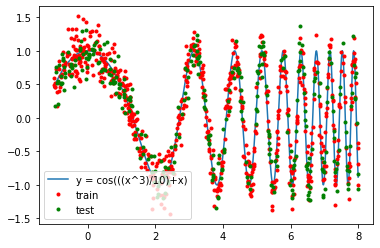

In [18]:
plt.plot(fx, fy, label = 'y = cos(((x^3)/10)+x)')
plt.plot(x_train, y_train, 'r.', label = 'train')
plt.plot(x_test, y_test, 'g.', label = 'test')
plt.legend()
plt.show()

**b)** (3 pont)<br>
Tanítsunk egyszerű polinomiális regressziót az adatra (célváltozó: $y$, magyarázó változó: $x$).
> Tipp: használd az *np.polyfit* függvényt!

* Ábrázold egy ábrán (külön színnel) a tanítóhalmazbeli és a teszthalmazbeli hibát (RMSE-értéket) a regressziós polinom fokának függvényében (változtasd a polinom fokát 0 és 20 között)!
* Készíts ábrákat 3x7-es rácsban, amelyeken látszik hogy az egyes polinomok hogyan simulnak az adatra! Az egyes részábrák címe mutassa melyik fokú polinomról van szó, az ábrák tengelyeit pedig rejtsd el!
> Tipp: használd a *plt.subplots* függvényt!

* Mit tapasztalsz?

**c)** (2 pont)<br>
Hogy változik a modell teljesítménye, ha változtatjuk a tanítóhalmaz méretét? 
* A regressziós polinom fokának rögzítése mellett változtasd a tanítóhalmaz méretét az eredeti tanítóhalmaz méretének megszorításával.
* A tanítóhalmaz méretének függvényében ábrázold egy ábrán a tanítóhalmazbeli és a teszthalmazbeli hibát (RMSE-értéket).
* Jelöld az ábrán a célváltozó generálásának véletlenségéből adódó belső (irreducibilis) hibát is, ez itt a *sigma* szórás értékének felel meg, vagyis konstans.
* Végezd el ezt az elemzést úgy, hogy a polinom fokát 1-re, 3-ra, 8-ra, majd 20-ra állítod.  
* Mit tapasztalsz? Értelmezd az ábrákat!

---

## 3. feladat (HF4/3) (9 pont)

Még mindig borban az igazság! 🍷 <br> Ebben a feladatban (a HF2/3 feladathoz hasonlóan) különböző borok minőségét kell prediktálnunk. Haladó osztályozási algoritmusok segítségével vizsgáljuk, hogy meg tudjuk-e jósolni pusztán a bor kémiai tulajdonságai alapján, hogy minőségi bornak fogja-e tartani a szakma.

In [19]:
#importáltam

In [61]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

**a)** (1 pont)<br>
Ismételd meg a HF2/3/a feladatot: A [UCI adattárházban](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) található adatok alapján fogunk vizsgálódni. Ez több ezer észak-portugáliai bor 11 kémiai tulajdonságát (pl. cukortartalom, pH, alkoholtartalom, stb.) és egy a borokra vonatkozó 10-es skálán mért minőségi mutatót tartalmaz.

* Töltsd be a **vörös**borok adatait egy pandas dataframe-be [az adattárházból](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (Az adatot közvetlenül az internetről, a fájl saját gépre való letöltése nélkül töltsd be!)
* A *quality* oszlop lesz a célváltozó, a többi pedig a magyarázóváltozó (feature). Bináris osztályozási feladatként tekintünk a továbbiakban a problémára, ezért a célváltozó értékét definiáld át: legyen az értéke 0, ha *quality $<$ 7* (rossz borok), és legyen az értéke 1, ha *quality $\geq$ 7* (jó borok).
* Hozz létre külön numpy array-ket a célváltozó és az attribútumok tárolására!

In [20]:
#betöltöttem az adatokat, létrehoztam a borok minősítésének oszlopát, a régit tötöltem, létrehoztam az attribútumok és a
#labelek adathalmazát

In [62]:
redwine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';', quotechar='.', header = 0)
redwine_num_data = redwine_data.values

for i in range(len(redwine_num_data)):
    if redwine_num_data[i][11] < 7:
        redwine_num_data[i][11] = 0
    else:
        redwine_num_data[i][11] = 1

redwine_num_data.astype(float)
redwine_labels = redwine_num_data[:, 11].astype(int)
redwine_features = np.delete(redwine_num_data, 11, 1)

**b)** (4 pont)<br>
Véletlen erdő
* Használj véletlen erdő algoritmust (20 fával) az osztályozásra! 
* Kérd le az egyes rekordokhoz tartozó valószínűségi pontértékeket! A bináris döntést ez alapján a pontérték alapján fogjuk meghozni, alapesetben 0.5 fölött tekintjük 1-es osztályba tartozónak, most viszont változtatni fogjuk a küszöbértéket.<br>
> Tipp: használd a *predict_proba* függvényt! 

* Írj egy *predict_with_threshold* nevű függvényt, aminek bemenő paraméterei a betanított osztályozó, az adatmátrix, amire a jóslást elvégezzük és a küszöbindex (a küszöbindex az a pontérték, ami felett 1-est döntünk), eredménye pedig a rekordokra vonatkozó bináris döntés.

* Tízszeres keresztvalidációval állapítsd meg, hogy milyen küszöbérték esetén lesz optimális az osztályozás F-mértéke! (Vizsgáld a küszöbértéket a 0.1, 0.2, $\dots$ 0.9 halmazon!)<br>
> Tipp: használd a *model_selection.cross_val_score* függvényt *scoring=modified_f1(threshold)* beállítással, ahol a *threshold* végigmegy a küszöbérték lehetséges értékein!

* Ábrázold a *threshold* függvényében a keresztvalidációs technikával kijövő F-mértékek boxplotját! Értelmezd a kapott ábrát, milyen érték esetén kapjuk a legjobb predikciót? Magyarázd el, hogy miért kaphattuk ezt az eredményt annak tükrében, hogy kiegyensúlyozatlan osztályeloszlású osztályozási feladaot oldottunk meg.<br>
> Tipp: használd a *seaborn* csomag boxplot függvényét!

Segítségképpen megadok egy *modified_f1* függvényt, aminek bemenete egy küszöbérték, eredménye pedig egy olyan függvény, ami megfelelő arra, hogy a *cross_val_score* *scoring* argumentuma legyen. Ez a függvény használja az általad megfelelően definiált *predict_with_threshold* nevű függvényt!

In [22]:
#véletlen erdő algoritmust alkalmaztam az adatokon 20 fával és lekértem a predict_proba függvényt

In [77]:
randfor = RandomForestClassifier(n_estimators = 20)
randfor.fit(redwine_features, redwine_labels)
randfor.predict_proba(redwine_features)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [21]:
#megírtam a kért függvényt, amely a beadott adatokon alkalmazza a predict_proba függvényt, létrehoz egy nullmátrixot, amelynek
#az elemeit feltölti 1-esekkel, ha a predikció a küszöbindex fölött teljesített, majd ezzel visszatér

In [64]:
def predict_with_threshold(clf , datamatrix, threshold):
    prob_test = clf.predict_proba(datamatrix)
    pred_test = np.zeros(len(datamatrix))
    for i in range(len(datamatrix)):
        if prob_test[:,1][i] > threshold:
            pred_test[i] = 1
    return pred_test

In [23]:
#ez adott volt

In [65]:
def modified_f1( threshold ):
    def f1_threshold( clf , X , y ):
        y_pred = predict_with_threshold( clf , X , threshold )
        return sklearn.metrics.f1_score( y , y_pred )
    return f1_threshold

In [24]:
#létrehoztam a küszöbindexek listáját, alkalmaztamm a cross_valiációs algoritmiust az adatokon véletlen erővel minden
#küszöbindex esetén

In [66]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cross_validations_scores = [cross_val_score(randfor, redwine_features, redwine_labels, cv = 10, scoring = modified_f1(i)) for i in thresholds]
cross_validations_scores

[array([0.44897959, 0.52830189, 0.42105263, 0.40816327, 0.63492063,
        0.45977011, 0.35643564, 0.375     , 0.47619048, 0.37647059]),
 array([0.32432432, 0.38095238, 0.44444444, 0.48648649, 0.63636364,
        0.5       , 0.41025641, 0.44444444, 0.56140351, 0.46428571]),
 array([0.35714286, 0.4       , 0.44067797, 0.42622951, 0.54054054,
        0.52631579, 0.4375    , 0.44827586, 0.56      , 0.48979592]),
 array([0.35714286, 0.44444444, 0.4       , 0.43137255, 0.54545455,
        0.64      , 0.4       , 0.5       , 0.53658537, 0.375     ]),
 array([0.25      , 0.37037037, 0.32432432, 0.5       , 0.46666667,
        0.59459459, 0.37209302, 0.47368421, 0.4       , 0.37037037]),
 array([0.09090909, 0.32      , 0.21428571, 0.4516129 , 0.37037037,
        0.14285714, 0.44444444, 0.46666667, 0.33333333, 0.35714286]),
 array([0.17391304, 0.        , 0.16      , 0.23076923, 0.08695652,
        0.08333333, 0.375     , 0.30769231, 0.24      , 0.17391304]),
 array([0.09090909, 0.        , 0.

In [25]:
#ábrázoltam az eredményeket boxploton

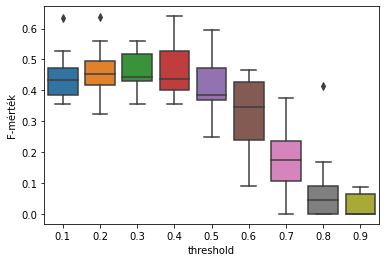

In [67]:
sns.boxplot(x = thresholds, y = cross_validations_scores)
plt.xlabel('threshold')
plt.ylabel('F-mérték')
plt.show()

0.3 érték esetén kapjuk a legjobb predikciót.
Mivel kiegyensúlyozatlan osztályeloszlású osztályozási a feladat, azaz egy egyik bináris változó előfordulása sokkal nagyobb, mint a másiké, ezért a modell nehezebben határozza meg a predikciót.

**c)** (1 pont)<br>
A véletlen erdő segítségével az attribútumokhoz rendelhetünk egy fontossági értéket. 
* Ábrázold a véletlen erdő által adott, az egyes attribútumokhoz tartozó relatív fontossági értékeket oszlopdiagramon.<br>
> Tipp: használd a *feature\_importances\_* opciót!

* Mi a két legfontosabb változó?

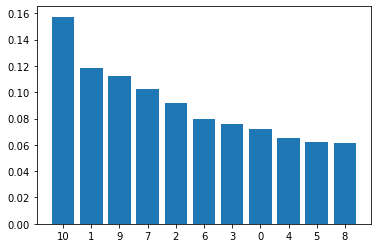

In [68]:
# ebben a részben ez a link segített: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = randfor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(redwine_features.shape[1]), importances[indices])
plt.xticks(range(redwine_features.shape[1]), indices)
plt.show()

A két legfontosabb változó a 10-es és a 9-es.

**d)** (3 pont)<br>
Az osztályozók által adott döntési határt érdekes ábrázolni, hogy jobban megértsük az osztályozó döntését, ugyanakkor ezt természetesen csak kis dimenzió esetén tudjuk vizuálisan értelmezni. Éppen ezért a következőkben szorítsd meg az attribútumteret az előző feladatrész alapján legfontosabbnak adódó két attribútumra! 
* Az alábbi osztályozók döntési határát ezután ábrázold a lent megadott ábrázoló függvény segítségével: 
    * döntési fa az alapértelmezett beállításokkal
    * véletlen erdő (15 döntési fával)
    * SVM (C = 100, gamma = 1.0 beállításokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight=None beállításokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight='balanced' beállításokkal) (A 'balanced' beállítás az osztály gyakoriságával fordítottan arányos módon rendel súlyt az egyes osztályba tartozó rekordokhoz.)
> Tipp: a szupport vektor géphez használd az *sklearn.svm.SVC* függvényt!

* Az *svm.SVC* milyen kernelt használ alapértelmezetten? Nézz utána és írd le, hogy ilyen esetben mi a C és a gamma szerepe?
* Értelmezd az ábrákat! Melyik esetben lehet túltanulásról beszélni, miért? Melyik döntési határ a legkomplexebb?
* Mi a szerepe a döntési határt illetően a class_weight két kipróbált beállításának? Melyik esetben lehet jobb a recall, a precision és az accurary érték? Hogy lehetne javítani az SVM teljesítményét?

A következőkben megadott döntési határt kirajzoló függvényt bátran módosítsd, javítsd, hogy jobban átlátható ábrákat kapj!

In [26]:
#ez adott volt

In [69]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap( [ '#FFAAAA' , '#AAFFAA' , '#AAAAFF' ] )
cmap_bold = ListedColormap( [ '#FF0000' , '#00FF00' , '#0000FF' ] )

def points_plot( X , y , clf , colorscale = cmap_light , cdiscrete=cmap_bold ):
    
    if X.shape[ 1 ] != 2:
        raise ValueError( "X should have two features!" )
    
    Xtr , Xte , ytr , yte = train_test_split( X , y , train_size = 0.6 )
    clf = clf.fit( Xtr , ytr )
    h = 0.01
    x_min , x_max = X[ : , 0 ].min() - 0.5 , X[ : , 0 ].max() + 0.5
    y_min , y_max = X[ : , 1 ].min() - 0.5 , X[ : , 1 ].max() + 0.5
    xx , yy = np.meshgrid( np.linspace( x_min , x_max , 50 ) , np.linspace( y_min , y_max , 50 ) )
    
    plt.figure()
    Z = clf.predict( np.c_[ xx.ravel() , yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    plt.pcolormesh( xx , yy , Z , cmap = cmap_light , alpha = 0.2 )
    # train points
    plt.scatter( Xtr[ : , 0 ] , Xtr[ : , 1 ] , c = ytr - 1 , cmap = cdiscrete , s = 50 , alpha = 0.2 , edgecolor = "k" )
    # test points
    plt.scatter( Xte[ : , 0 ] , Xte[ : , 1 ] , c = yte - 1 , cmap = cdiscrete , alpha = 0.5 , marker = "s" , s = 35 )
    plt.xlim( xx.min() , xx.max() )
    plt.ylim( yy.min() , yy.max() )
    # titles, labels
    plt.title( str( clf )[ 0 : str( clf ).find( "(" ) ] )
    plt.xlabel( "Feature 1" )
    plt.ylabel( "Feature 2" )

In [27]:
#az előző feladatrész alapján leszűkítettem az attribútumok halmazát 2-re

In [76]:
redwine_features_less = redwine_features[:,-2:]

In [28]:
#ábrázoltam a döntési fa osztályozót

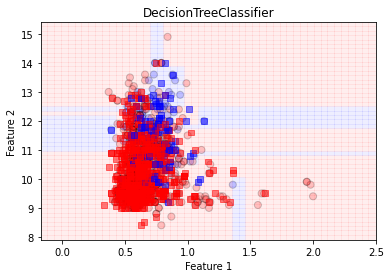

In [71]:
points_plot(redwine_features_less, redwine_labels, DecisionTreeClassifier())

In [29]:
#ábrázoltam a véletlen erdő osztályozót 15 fával

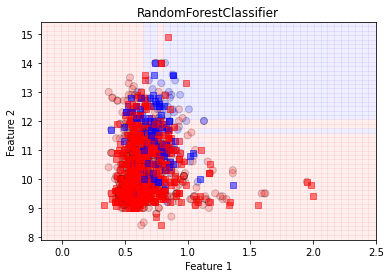

In [72]:
points_plot(redwine_features_less, redwine_labels, RandomForestClassifier(n_estimators=15))

In [30]:
#ábrázoltam az SVM osztályozót a megadott beállításokkal

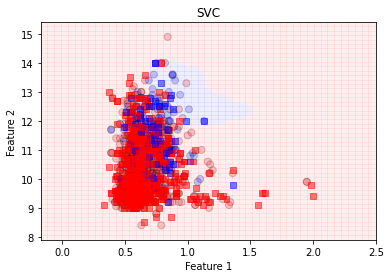

In [73]:
points_plot(redwine_features_less, redwine_labels, SVC(C = 100, gamma = 1.0))

In [31]:
#ábrázoltam az SVM osztályozót a megadott beállításokkal

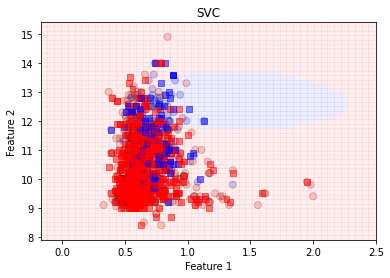

In [74]:
points_plot(redwine_features_less, redwine_labels, SVC(C = 1.0, gamma = 1.0, class_weight=None))

In [32]:
#ábrázoltam az SVM osztályozót a megadott beállításokkal

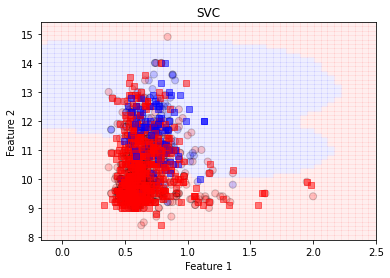

In [75]:
points_plot(redwine_features_less, redwine_labels, SVC(C = 1.0, gamma = 1.0, class_weight = 'balanced'))

Az svm.SVC default=’rbf’ kernelt használ alapértelmezetten.
A C a szeparáláshoz használt margó inverzének a paramétere.
A gamma mértétől függ, hogy mennyire tanul rá az adatra a modell, ha nagy akkor jobban, ha kicsi, akkor kevésbé tanul rá.
Az első esetben lehet túltanulásról beszélni, több piros pont van a kék halmazban.
Az első svm esetén lesz a döntési határ a legkomplexebb.
Ha nem adjuk meg a class_weight-t, akkor azt feltételezi, hogy minden osztálynak van súlya, és ha súlyt állítunk be az osztályoknak, akkor megváltozhat a döntési határ.

---